**단계 1:** 파이썬 패키지 import

In [14]:
# 필요한 패키지를 import합니다.
# SVM을 사용하기 위해서 SVM 모형인 SVC (Support vector classifier) 클래스를 import 합니다.
# 그래프나 데이터 로드와 관련된 세세한 코드를 작성하지 않더라도 동작하도록 하는 패키지 입니다.
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import mglearn

/Library/Python/3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Library/Python/3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


**단계 2:** moon 데이터 생성 및 다항식 커널을 사용한 SVM 비선형 분류

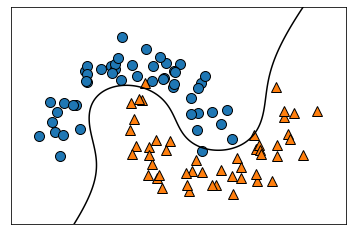

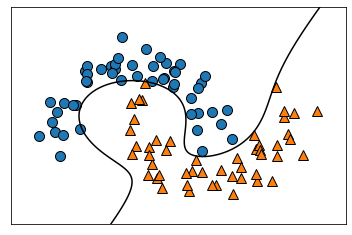

In [15]:
# 비선형 분류에 사용할 데이터를 생성합니다.
# 본 예제에서는 초승달 데이터 셋을 만들어 사용합니다.
# n_samples는 샘플의 갯수, noise는 샘플 데이터에 가우시안 잡음에서 발생하는 표준 편차를 얼마나 넣을 것인지
# random_state는 난수를 발생하는데 관여합니다.

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Pipeline 기능은 전처리와 분류에 대해 각각 작성해야 하는 코드를 하나로 합칩니다.

# StandardScaler는 스케일러를 의미합니다. (평균이 0, 표준편차가 1이 되도록 변환)
# 데이터를 모델링하기 전에는 반드시 스케일 과정이 필요하며, 다차원의 값들을 비교 분석하기 쉽게 만들어 줍니다.
# 자료의 오버/언더플로우를 방지하고 최적화 과정에서의 안정성과 학습의 수렴 속도를 향상시킵니다.

# SVC는 사이킷런에서 SVM을 사용하기 위한 함수 입니다.
# kernel은 어떤 알고리즘을 사용할 것인지, degree는 다항식 커널의 차원, cef0/C는 하이퍼 파라미터를 의미합니다

# 비선형 분류를 수행하고, 산점도와 경계를 포함하는 그래프를 그립니다.

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))

])

poly_kernel_svm_clf.fit(X, y)

poly_kernel_svm_clf2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))

])

poly_kernel_svm_clf2.fit(X, y)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(poly_kernel_svm_clf, X)
plt.show()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(poly_kernel_svm_clf2, X)
plt.show()

**단계 3:** 유사도 특성을 사용한 SVM 비선형 분류

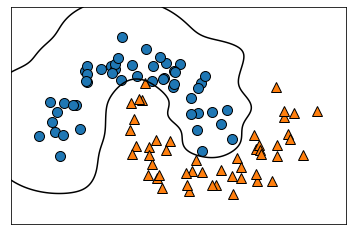

In [17]:
# 앞에서 다항식 커널을 사용하여 SVM 비선형 분류를 하였다면 이번 예제에서는 유사도 특성을 사용합니다.
# 유사도 특성을 위해서 가우시안 방저 기저 함수를 사용함 (rbf)
gamma_lst = [0.1, 0.1, 5, 5]
C_lst = [0.001, 1000, 0.001, 1000]

for g, c in zip(gamma_lst, C_lst):
    rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=g, C=c))
    ])

    rbf_kernel_svm_clf.fit(X, y)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
    mglearn.plots.plot_2d_separator(rbf_kernel_svm_clf, X)
    plt.show()